In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from google.colab import files
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from google.colab import files
uploaded = files.upload()

In [7]:
# Load the train data
df_train = pd.read_csv("/content/drive/MyDrive/fashion-mnist_train.csv")

# Load the test data
df_test = pd.read_csv("/content/drive/MyDrive/fashion-mnist_test.csv")

In [8]:
# Preprocess the data
X_train = df_train.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
X_test = df_test.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(df_train['label'].values)
y_test = to_categorical(df_test['label'].values)

In [9]:
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 57s 119ms/step - loss: 0.6597 - accuracy: 0.7606 - val_loss: 0.3977 - val_accuracy: 0.8553
Epoch 2/10
469/469 [==============================] - 51s 108ms/step - loss: 0.4263 - accuracy: 0.8484 - val_loss: 0.3320 - val_accuracy: 0.8811
Epoch 3/10
469/469 [==============================] - 50s 107ms/step - loss: 0.3751 - accuracy: 0.8667 - val_loss: 0.3099 - val_accuracy: 0.8855
Epoch 4/10
469/469 [==============================] - 53s 114ms/step - loss: 0.3408 - accuracy: 0.8790 - val_loss: 0.2815 - val_accuracy: 0.8958
Epoch 5/10
469/469 [==============================] - 50s 106ms/step - loss: 0.3178 - accuracy: 0.8852 - val_loss: 0.2656 - val_accuracy: 0.9010
Epoch 6/10
469/469 [==============================] - 51s 109ms/step - loss: 0.2953 - accuracy: 0.8931 - val_loss: 0.2541 - val_accuracy: 0.9057
Epoch 7/10
469/469 [==============================] - 51s 110ms/step - loss: 0.2790 - accuracy: 0.8992 - val_loss: 0.2442 - val_ac

In [12]:
# Plot training history
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

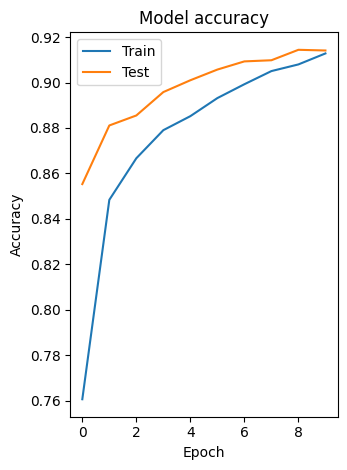

In [13]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

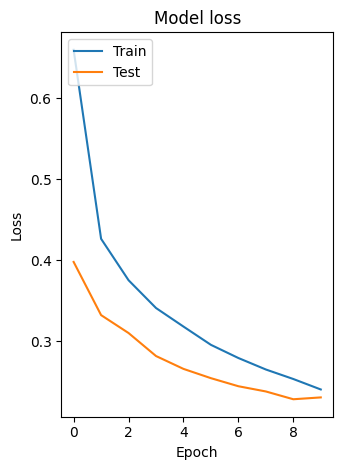

In [14]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()